# Projeto de Precificação de Imóvel

**Objetivo:** precificar um imóvel disponível para alugueis na cidade de Nova York.

- Além da precificação algumas perguntas do cliente devem ser respondidas:

    - a. Pensando em investir em um apartamento para alugar na plataforma, em quais bairro seria mais indicada a compra? 
    - b. O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?
    - c. Existe algum padrão no texto do nome do local para lugares de mais alto valor?

- Etapas: 
    - 1. Análise exploratória dos dados (EDA)
    - 2. Modelo de precificação
    - 3. Resumo final
    

- Caracteristicas do apartamento que será precificado
    - Supondo um apartamento com as seguintes características:

| Atributo                         | Valor                     |
|----------------------------------|---------------------------|
| **ID**                           | 2595                      |
| **Nome**                         | Skylit Midtown Castle     |
| **Host ID**                      | 2845                      |
| **Host Name**                    | Jennifer                  |
| **Bairro Group**                 | Manhattan                 |
| **Bairro**                       | Midtown                   |
| **Latitude**                     | 40.75362                  |
| **Longitude**                    | -73.98377                 |
| **Room Type**                    | Entire home/apt           |
| **Mínimo de Noites**             | 1                         |
| **Número de Reviews**            | 45                        |
| **Última Review**                | 2019-05-21                |
| **Reviews por Mês**              | 0.38                      |
| **Calculado Host Listings Count** | 2                         |
| **Disponibilidade (365 dias)**    | 355                       |





# 1. Anáise exploratória de dados (EDA)

In [1]:
import pandas as pd

In [108]:
data = pd.read_csv('./data/teste_indicium_precificacao.csv')

Conhecendo o data frame 

In [3]:
data.shape

(48894, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [5]:
data.head(20)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
7,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
8,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
9,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6


- Para conhecer melhor os dados checamos se existe algum 'id' duplicado e colunas com valores nulos.

### 1.1. Identificando e tratando valores nulos ou duplicados


In [6]:
# 'id' é uma chave exclusiva, ou seja, não deve haver duplicata
# Verificando a existência de 'id' duplicado 

id_duplicata = data[data['id'].duplicated()]
id_duplicata

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365


In [7]:
# Verificando se há valores nulos no DF
data.isnull().sum().head(16)

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

- Foram identificadas 16 linhas com a coluna 'nome' nula e 21 linhas com a coluna 'host_name' nulos. 
- Foram identificadas também 10.052 linhas nulas nas colunas 'ultima_review' e 'review_por_mes'. 

- Por se tratarem de um número pequeno de linhas, considerado o tamanho do dataset (48894 linhas), as linhas com 'nome' e 'host_name' nulas serão retiradas do DF. 

- Por se tratar de um valore significativos de células do DF, as linhas com valores nulos nas colunas 'ultima_review' e 'review_por_mes' terão os valores das células substituídos por 'desconhecido'.

In [8]:
# Removendo linhas nulas em 'nome' e 'host_name'
data = data.dropna(subset=['nome','host_name'])


In [9]:
# Checando se a remoção funcionou 
data.isnull().sum().head(16)

id                                   0
nome                                 0
host_id                              0
host_name                            0
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10037
reviews_por_mes                  10037
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [10]:
# Substituindo as células nulas em 'ultima_review' por 'desconhecido'

data['ultima_review'] = data['ultima_review'].fillna('desconhecido') 

In [11]:
# Checando se a coluna 'ultima_review' possui valores nulos
data['ultima_review'].isnull().any()

np.False_

In [12]:
# Substituindo as células nulas em 'review_por_mes'  por 'desconhecido'
data['reviews_por_mes'] = data['reviews_por_mes'].fillna('desconhecido') 

In [13]:
# Checando se a coluna 'reviews_por_mes' possui valores nulos
data['reviews_por_mes'].isnull().any()

np.False_

In [14]:
# Checando se há anúncios com preço igual a zero 
data[data['price']==0].value_counts()

id        nome                                                host_id    host_name     bairro_group  bairro              latitude  longitude  room_type        price  minimo_noites  numero_de_reviews  ultima_review  reviews_por_mes  calculado_host_listings_count  disponibilidade_365
18750597  Huge Brooklyn Brownstone Living, Close to it all.   8993084    Kimberly      Brooklyn      Bedford-Stuyvesant  40.69023  -73.95428  Private room     0      4              1                  2018-01-06     0.05             4                              28                     1
20333471  ★Hostel Style Room | Ideal Traveling Buddies★       131697576  Anisha        Bronx         East Morrisania     40.83296  -73.88668  Private room     0      2              55                 2019-06-24     2.56             4                              127                    1
20523843  MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)     15787004   Martial Loft  Brooklyn      Bushwick            40.69467  -73.92433 

- Existem 11 de anúncios com 'price' == 0. Por ser um número de linhas mínimo, comparado ao tamanho do dataset, poderíamos excluir. Porém, existe outra maneira de manter essas linhas no dataset: vamos localizar e substituir pela média da coluna 'price' por bairro.

In [15]:
# Localizando os anúncios de preço nulo e substituindo pela média
data.loc[(data['price']==0) & (data['bairro_group']=='Brooklyn'), 'price'] = data[data['bairro_group']=='Brooklyn']['price'].mean()
data.loc[(data['price']==0) & (data['bairro_group']=='Bronx'), 'price'] = data[data['bairro_group']=='Bronx']['price'].mean()
data.loc[(data['price']==0) & (data['bairro_group']=='Manhattan'), 'price'] = data[data['bairro_group']=='Manhattan']['price'].mean()

/tmp/ipykernel_875/1496523980.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '124.40929908403027' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[(data['price']==0) & (data['bairro_group']=='Brooklyn'), 'price'] = data[data['bairro_group']=='Brooklyn']['price'].mean()


In [16]:
# Checando se a substituição foi realizada com sucesso 
data[data['price']==0].value_counts()

Series([], Name: count, dtype: int64)

In [17]:
# Checando se há latitude == 0 
data[data['latitude']==0].value_counts()

Series([], Name: count, dtype: int64)

In [18]:
# Checando se há longitude == 0 
data[data['longitude']==0].value_counts()

Series([], Name: count, dtype: int64)

In [19]:
# Checando se há anúncios com 'zero' como número mínimo de noites
data[data['minimo_noites']==0].value_counts()

Series([], Name: count, dtype: int64)

In [20]:
# Checando se há anúncios que estão disponíveis 'zero' dias (ou seja, nenhum dia do ano)
data[data['disponibilidade_365']==0].value_counts() 

id        nome                                                host_id    host_name        bairro_group  bairro              latitude  longitude  room_type        price  minimo_noites  numero_de_reviews  ultima_review  reviews_por_mes  calculado_host_listings_count  disponibilidade_365
36424776  Queen size bedroom in two bed apt with great light  13384464   Hollie           Brooklyn      Bedford-Stuyvesant  40.69617  -73.94198  Private room     50.0   3              0                  desconhecido   desconhecido     1                              0                      1
5022      Entire Apt: Spacious Studio/Loft by central park    7192       Laura            Manhattan     East Harlem         40.79851  -73.94399  Entire home/apt  80.0   10             9                  2018-11-19     0.1              1                              0                      1
5121      BlissArtsSpace!                                     7356       Garon            Brooklyn      Bedford-Stuyvesant  40.68688

- Um número expressivo (17363 linhas) de anúncios está com a coluna de noites disponível igual a 'zero'.
- Para corrigir esses anúncios, substituir pela média de 'disponibilidade_365' do respectivo bairro do anúncio. 

In [21]:
# Substituindo a 'disponibilidade_365' pela média de disponibilidade de cada bairro

# bairro Brooklyn
data.loc[(data['disponibilidade_365']==0) & (data['bairro_group']=='Brooklyn'), 'disponibilidade_365'] = data[data['bairro_group']=='Brooklyn']['disponibilidade_365'].mean()

# Bairro Bronx
data.loc[(data['disponibilidade_365']==0) & (data['bairro_group']=='Bronx'), 'disponibilidade_365'] = data[data['bairro_group']=='Bronx']['disponibilidade_365'].mean()

# Bairro Manhattan
data.loc[(data['disponibilidade_365']==0) & (data['bairro_group']=='Manhattan'), 'disponibilidade_365'] = data[data['bairro_group']=='Manhattan']['disponibilidade_365'].mean()

# Bairro Queens
data.loc[(data['disponibilidade_365']==0) & (data['bairro_group']=='Queens'), 'disponibilidade_365'] = data[data['bairro_group']=='Queens']['disponibilidade_365'].mean()

# Bairro Staten Island
data.loc[(data['disponibilidade_365']==0) & (data['bairro_group']=='Staten Island'), 'disponibilidade_365'] = data[data['bairro_group']=='Staten Island']['disponibilidade_365'].mean()

/tmp/ipykernel_875/2701038527.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '100.2226204699323' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[(data['disponibilidade_365']==0) & (data['bairro_group']=='Brooklyn'), 'disponibilidade_365'] = data[data['bairro_group']=='Brooklyn']['disponibilidade_365'].mean()


In [22]:
# Chacando se a substituição funcionou corretamente 
data[data['disponibilidade_365']==0].value_counts()

Series([], Name: count, dtype: int64)

Ações realizadas nessa etapa: 


- Remoção de linhas nulas nas colunas 'name' e 'host_name'
- Os valores nulos nas colunas 'ultima_review' e 'reviews_por_mes' foram substituídos por 'desconhecido'. 
- Anúncios com 'price' == 0 foram substituídos pela média de 'price' do seu respectivo bairro.
- Anúncios com disponibilidade mínima ao ano igual a zero, foi substituído 'disponibilidade_365' pela média de disponibilidade do respectivo bairro. 


Agora que a etapa de limpeza do DF foi finalizada, podemos iniciar uma análise exploratória.  

### 1.2. Buscando Outliers 

Outliers são valores fora do padrão para a variável investigada. Vamos checar as variáveis numéricas do dataset utilizando o método de IDR (intervalo interquartil). 


In [23]:
# Identificando colunas com variáveis 'int64' ou 'float64' 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48857 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48857 non-null  int64  
 1   nome                           48857 non-null  object 
 2   host_id                        48857 non-null  int64  
 3   host_name                      48857 non-null  object 
 4   bairro_group                   48857 non-null  object 
 5   bairro                         48857 non-null  object 
 6   latitude                       48857 non-null  float64
 7   longitude                      48857 non-null  float64
 8   room_type                      48857 non-null  object 
 9   price                          48857 non-null  float64
 10  minimo_noites                  48857 non-null  int64  
 11  numero_de_reviews              48857 non-null  int64  
 12  ultima_review                  48857 non-null  obje

- Existem algumas variáveis numéricas que não carecem de uma análise IQR, são elas: 'id', 'host_id', 'latitude' e 'longitude'.

- Vamos analisar melhor a dispersão das variáveis: 'price', 'minimo_noites', 'numero_de_reviews' e 'disponibilidade_365'.

In [24]:
# Descrição estatística da variável price 

data['price'].describe()

count    48857.000000
mean       152.769123
std        240.224481
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

A discrepância dos resultados do valor mínimo por noite (U$ 10) e do valor máximo por noite (U$ 10000), seguidos de um desvio padrão elevado, indicam a presença de outliers. 

In [25]:
# Definindo os quartis para calcular iqr da variável 'price'
q1_preco = data['price'].quantile(0.25)
q3_preco = data['price'].quantile(0.75)
iqr_preco = q3_preco - q1_preco

preco_inferior = q1_preco - 1.5*iqr_preco
preco_superior = q3_preco + 1.5* iqr_preco


print('Distribuição dos quartis para variável "price" \n')
print(f' Q1: U$ {q1_preco:0.02f} \n Q3: U$ {q3_preco:0.02f} \n')
print(f' IQR: U$ {iqr_preco:0.02f} \n\n Limite inferior: U$ {preco_inferior:0.02f} \n Limite Superior: U$ {preco_superior:0.02f}')

Distribuição dos quartis para variável "price" 

 Q1: U$ 69.00 
 Q3: U$ 175.00 

 IQR: U$ 106.00 

 Limite inferior: U$ -90.00 
 Limite Superior: U$ 334.00


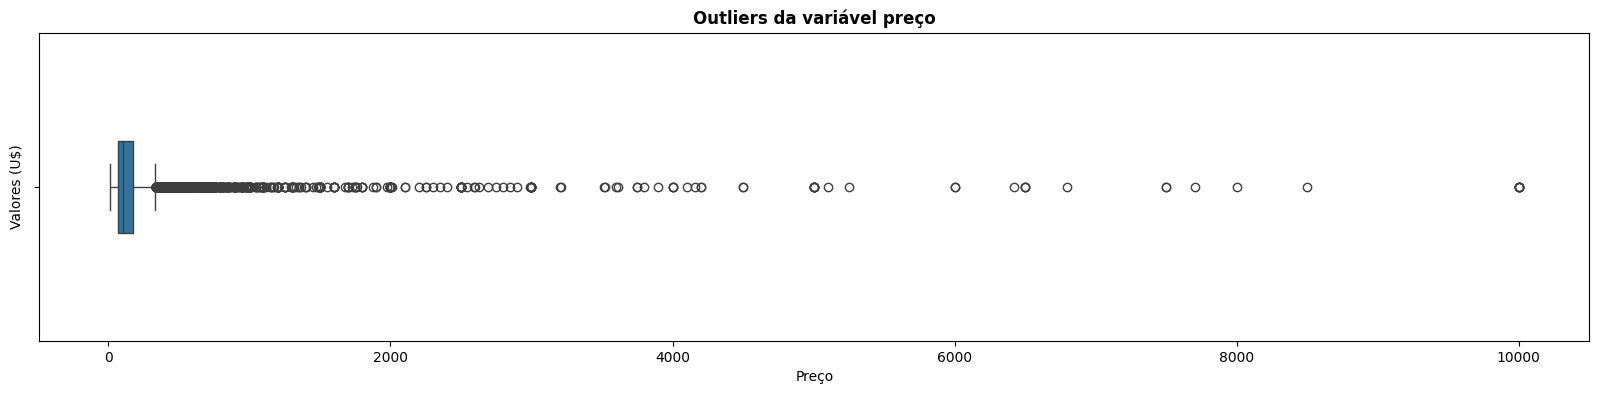

• Observando o boxplot é possível notar uma assimetria à direta na distribuição da variável preço 
• Isso ocorre devido ao número de preços contabilizados acima do limite superior (2971). 
 Esses valores elevados podem representar aluguel de imóveis de luxo por exemplo.

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
sns.boxplot(data=data, x='price', width=0.3)
plt.title(f'Outliers da variável preço', fontweight='bold')
plt.xlabel('Preço')
plt.ylabel('Valores (U$)')
plt.show()

len_superior = len(data[data['price']>preco_superior])
from rich import print
print(f'• Observando o boxplot é possível notar uma [bold]assimetria à direta[/bold] na distribuição da variável preço \n• Isso ocorre devido ao número de preços contabilizados acima do limite superior ({len_superior}). \n Esses valores elevados podem representar aluguel de imóveis de luxo por exemplo.')

In [27]:
# Descrição estatística da variável 'minimo_noites' 

data['minimo_noites'].describe()

count    48857.000000
mean         7.012567
std         20.019944
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimo_noites, dtype: float64

In [28]:
# Definindo iqr da variável 'minimo_noite'

q1_min_noites = data['minimo_noites'].quantile(0.25)
q3_min_noites = data['minimo_noites'].quantile(0.75)

iqr_min_noites = q3_min_noites - q1_min_noites

min_noites_inferior = q1_min_noites - 1.5*iqr_min_noites
min_noites_superior = q3_min_noites + 1.5*iqr_min_noites

len_minimo_noite_sup = data[data['minimo_noites']>11].value_counts()
print(f'Distribuição dos quartis para minimo_noites \n Q1: {q1_min_noites} noites \n Q3: {q3_min_noites} noites \n\n IQR: {iqr_min_noites} noites\n\n Limite inferior: {min_noites_inferior} noites \n Limite Superior: {min_noites_superior} noites')


Distribuição dos quartis para minimo_noites 
 Q1: 1.0 noites 
 Q3: 5.0 noites 

 IQR: 4.0 noites

 Limite inferior: -5.0 noites 
 Limite Superior: 11.0 noites

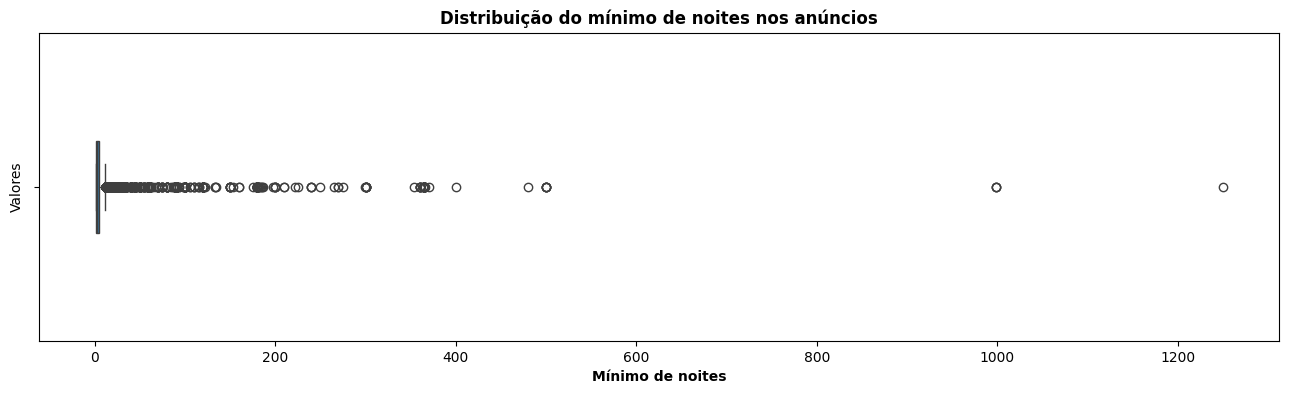

• A assimetria à direita da distribuição no boxplot indica a maioria dos anúncios exigem entre 1-5 noites. 
• Anúncios que exigem mais de 11 noites (limite superior) podem ser considerados outliers. 
• Esses resultados indicam que, uma quantidade expressiva de proprietários evitam alugar para estadias longas. 
Entretanto essas estadias existem e podem indicar um segmento de mercado diferente (contratos de médio prazo).

In [29]:
# Plotando a distribuição da variável 'minimo_noites' 


plt.figure(figsize=(16,4))
sns.boxplot(data=data, x='minimo_noites', width=0.3)
plt.title('Distribuição do mínimo de noites nos anúncios', fontweight='bold')
plt.xlabel('Mínimo de noites', fontweight='bold')
plt.ylabel('Valores')
plt.show()
print(f'• A assimetria à direita da distribuição no boxplot indica a maioria dos anúncios exigem entre 1-5 noites. \n• Anúncios que exigem mais de 11 noites (limite superior) podem ser considerados outliers. \n• Esses resultados indicam que, uma quantidade expressiva de proprietários evitam alugar para estadias longas. Entretanto essas estadias existem e podem indicar um segmento de mercado diferente (contratos de médio prazo).')

In [30]:
# Analisando a distribuição iqr para a variável 'numero _de_reviews' 

data['numero_de_reviews'].describe()

count    48857.000000
mean        23.273390
std         44.550307
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: numero_de_reviews, dtype: float64

In [31]:
# definindo iqr da variável 'numero_de_reviews' 

q1_reviews = data['numero_de_reviews'].quantile(0.25)
q3_reviews = data['numero_de_reviews'].quantile(0.75)

iqr_reviews = q3_reviews - q1_reviews

reviews_lim_inferior = q1_reviews -1.5*iqr_reviews
reviews_lim_superior = q3_reviews + 1.5*iqr_reviews

print(f'Distribuição dos quartis para numero_de_reviews \n • Q1: {q1_reviews} reviews \n • Q3: {q3_reviews} reviews \n\n • IQR: {iqr_reviews} reviews\n\n • Limite inferior: {reviews_lim_inferior} reviews \n • Limite Superior: {reviews_lim_superior} reviews')


Distribuição dos quartis para numero_de_reviews 
 • Q1: 1.0 reviews 
 • Q3: 24.0 reviews 

 • IQR: 23.0 reviews

 • Limite inferior: -33.5 reviews 
 • Limite Superior: 58.5 reviews

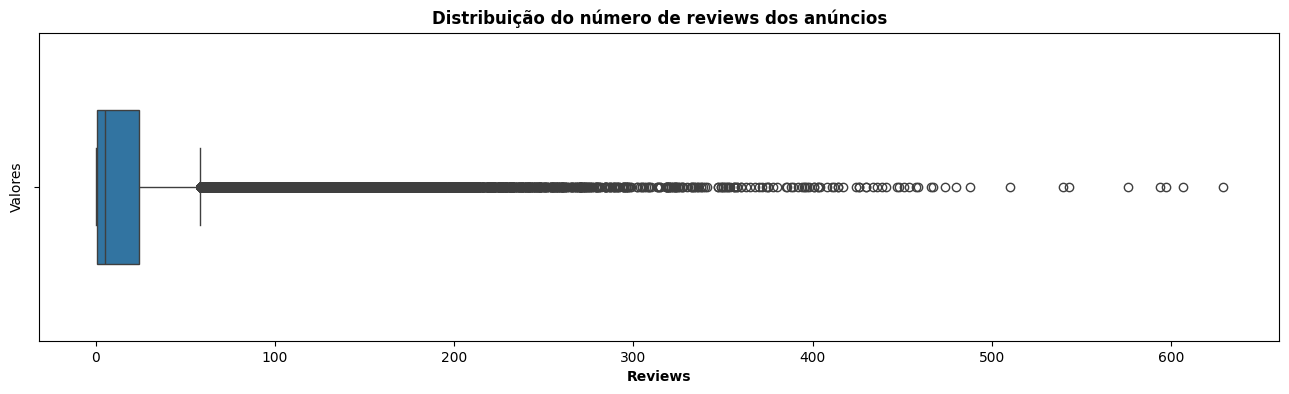

• A assimetria à direita indica que a maioria dos anúncios possuem poucos reviews.
• A maioria dos anúncios tem até 23 avaliações, mas existem alguns poucos anúncios muito populares com mais de 56 
avaliações.
• Acima de 56 reviews, podem representar anúncios altamente bem-sucedidos, possivelmente de hospedagens muito 
procuradas ou anfitriões experientes com maior volume de reservas. Vale aprofundar para identificar o que esses 
anúncios possuem de diferencial que os tornam tão atraentes.

In [32]:
# plotando boxplot minimo_de_reviews

plt.figure(figsize=(16,4))
sns.boxplot(data=data, x='numero_de_reviews', width=0.5)
plt.title('Distribuição do número de reviews dos anúncios', fontweight='bold')
plt.xlabel('Reviews', fontweight='bold')
plt.ylabel('Valores')
plt.show()

print(f'• A assimetria à direita indica que a maioria dos anúncios possuem poucos reviews.\n• A maioria dos anúncios tem até 23 avaliações, mas existem alguns poucos anúncios muito populares com mais de 56 avaliações.\n• Acima de 56 reviews, podem representar anúncios altamente bem-sucedidos, possivelmente de hospedagens muito procuradas ou anfitriões experientes com maior volume de reservas. Vale aprofundar para identificar o que esses anúncios possuem de diferencial que os tornam tão atraentes. ')

In [33]:
# Analisando a distribuição da variável 'disponibilidade_365' 

data['disponibilidade_365'].describe()

count    48857.000000
mean       152.224370
std        106.191669
min          1.000000
25%        100.000000
50%        112.013445
75%        227.000000
max        365.000000
Name: disponibilidade_365, dtype: float64

In [34]:
# definindo iqr para a variável 'disponibilidade_365'

q1_disponibilidade = data['disponibilidade_365'].quantile(0.25)
q3_disponibilidade = data['disponibilidade_365'].quantile(0.75)
iqr_disponibilidade = q3_disponibilidade - q1_disponibilidade
disponibilidade_lim_inf = q1_disponibilidade - 1.5*iqr_disponibilidade
disponibilidade_lim_super = q3_disponibilidade + 1.5*iqr_disponibilidade

print(f'Distribuição dos quartis para disponibilidade anual \n • Q1: {q1_disponibilidade} dias \n • Q3: {q3_disponibilidade} dias \n\n • IQR: {iqr_disponibilidade} dias\n\n • Limite inferior: {disponibilidade_lim_inf} dias \n • Limite Superior: {disponibilidade_lim_super} dias')

Distribuição dos quartis para disponibilidade anual 
 • Q1: 100.0 dias 
 • Q3: 227.0 dias 

 • IQR: 127.0 dias

 • Limite inferior: -90.5 dias 
 • Limite Superior: 417.5 dias

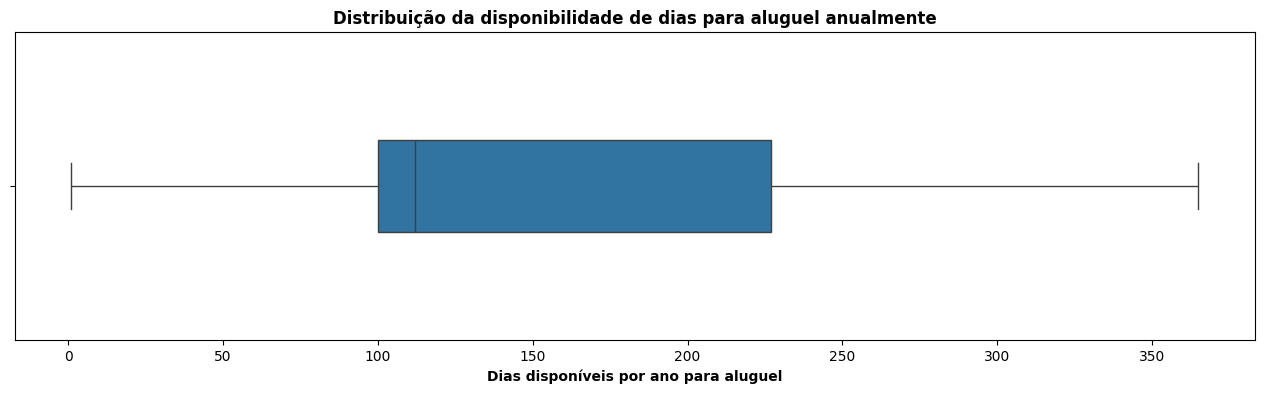

• Muitos anfitriões limitam a disponibilidade (talvez por uso pessoal ou sazonalidade). 
• Os anúncios abaixo de 90 dias podem ser considerados anfitriões que alugam só em algumas temporadas. Já os 
anúncios acima de 220 dias disponíveis provavelmente são locações com fim comercial.

In [35]:
# plotando o boxplt da variável disponibilidade_365

plt.figure(figsize=(16,4))
sns.boxplot(data=data, x='disponibilidade_365', width=0.3)
plt.title('Distribuição da disponibilidade de dias para aluguel anualmente', fontweight='bold')
plt.xlabel('Dias disponíveis por ano para aluguel', fontweight='bold')
plt.show()

print('• Muitos anfitriões limitam a disponibilidade (talvez por uso pessoal ou sazonalidade). \n• Os anúncios abaixo de 90 dias podem ser considerados anfitriões que alugam só em algumas temporadas. Já os anúncios acima de 220 dias disponíveis provavelmente são locações com fim comercial.')

- Das variáveis numéricas analisadas, a variável 'price' e 'minimo_noites' apresentaram outliers expressivos. 
- Esses outliers serão removidos do dataset para uma análise mais precisa. 


In [36]:
# Fazendo uma cópia do dataset antes de remover os outliers 
newdata = data.copy()

In [37]:
# Removendo outliers do dataset
newdata.drop(newdata[newdata['price'] > preco_superior].index, axis=0, inplace=True)
newdata.drop(newdata[newdata['minimo_noites'] > min_noites_superior].index, axis=0, inplace=True)

# Comparando o shape do dataset original com o novo 
print(f'Tamanho dos datasets:\nDataset original {data.shape}. \nDataset atualizado {newdata.shape}.')

Tamanho dos datasets:
Dataset original (48857, 16). 
Dataset atualizado (39702, 16).

In [38]:
# Comparando o comportamento estatístico das variáveis que tiveram outliers removidos 
data['price'].describe()

count    48857.000000
mean       152.769123
std        240.224481
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [39]:
newdata['price'].describe()

count    39702.000000
mean       119.028921
std         67.155222
min         10.000000
25%         65.000000
50%        100.000000
75%        155.000000
max        334.000000
Name: price, dtype: float64

- A remoção dos outliers de preço levaram a mudanças significativas no comportamento da variável. 
- A média de preço caiu de U$ 152.76 para U$ 119.02. 
- O desvio padrão caiu de U$ 240.22 para U$67.15. 
- O preço máximo foi reduzido de U$ 10000 para U$ 334. 

Text(0.5, 0, 'Preço (U$)')

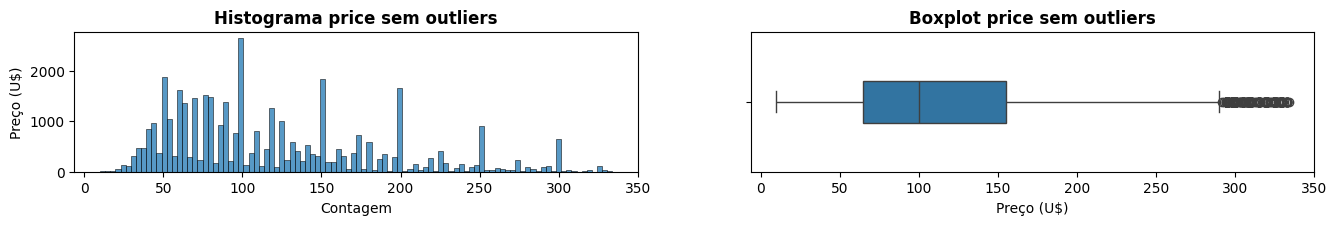

In [40]:
# Visualizando as mudanças de preço em um histograma e boxplot

plt.figure(figsize=(16,4))

plt.subplot(221)
sns.histplot(data=newdata, x='price', bins=100)
plt.title('Histograma price sem outliers', fontsize=12, fontweight='bold')
plt.xlabel('Contagem')
plt.ylabel('Preço (U$)')

plt.subplot(222)
sns.boxplot(data=newdata, x='price', width=0.3)
plt.title('Boxplot price sem outliers', fontsize=12, fontweight='bold')
plt.xlabel('Preço (U$)')


In [41]:
data['minimo_noites'].describe()

count    48857.000000
mean         7.012567
std         20.019944
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimo_noites, dtype: float64

In [42]:
newdata['minimo_noites'].describe()

count    39702.000000
mean         2.696413
std          1.863249
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: minimo_noites, dtype: float64

Text(0.5, 0, 'Mínimo de noites')

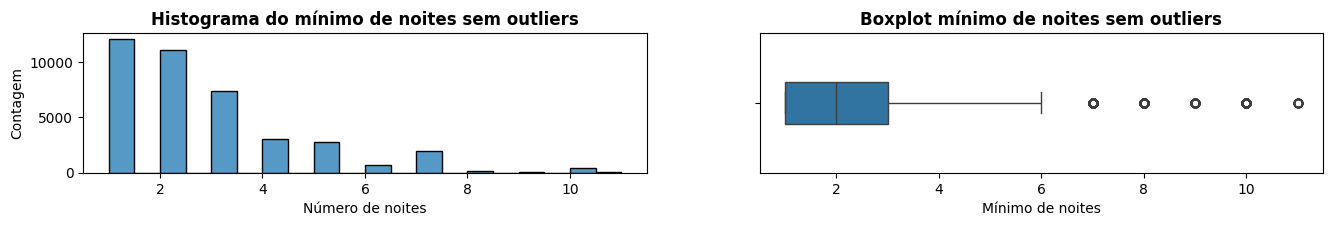

In [43]:
# Visualizando as mudanças de mínimo noites em um histograma e boxplot

plt.figure(figsize=(16,4))

plt.subplot(221)
sns.histplot(data=newdata, x='minimo_noites', bins=20)
plt.title('Histograma do mínimo de noites sem outliers', fontsize=12, fontweight='bold')
plt.xlabel('Número de noites')
plt.ylabel('Contagem')

plt.subplot(222)
sns.boxplot(data=newdata, x='minimo_noites', width=0.3)
plt.title('Boxplot mínimo de noites sem outliers', fontsize=12, fontweight='bold')
plt.xlabel('Mínimo de noites')


### 1.3. Análise bivariada 


In [44]:
# Quantificando anúncios por bairro
newdata['bairro_group'].value_counts()

bairro_group
Brooklyn         17333
Manhattan        15992
Queens            5025
Bronx             1008
Staten Island      344
Name: count, dtype: int64

In [45]:
# Identificando a nova média de preço por bairro 
media_preco_bairro = newdata.groupby('bairro_group')['price'].mean().sort_values()
media_preco_bairro

bairro_group
Bronx             78.107608
Staten Island     89.520349
Queens            91.127164
Brooklyn         107.112437
Manhattan        143.926019
Name: price, dtype: float64

Text(0, 0.5, 'Preço em U$')

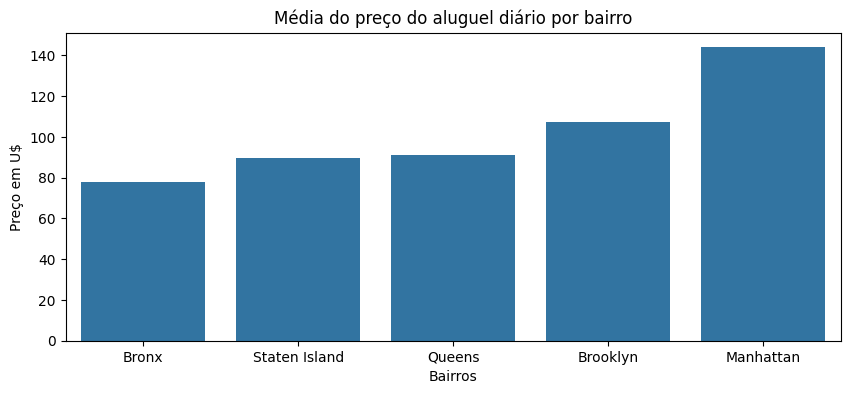

In [46]:
# Visualizando a média de preço 
plt.figure(figsize=(10,4))
sns.barplot(x=media_preco_bairro.index, y=media_preco_bairro.values)
plt.title('Média do preço do aluguel diário por bairro')
plt.xlabel('Bairros')
plt.ylabel('Preço em U$')


- Considerando apenas as variáveis bairro e preço, vemos que Manhattan é o bairro com a maior média de preço. 

- Para responder a pergunta do cliente de qual melhor bairro para investimento é preciso considerar a influência de outras variáveis como minimo_de_noites para determinar qual bairro poderá ter melhor perspectiva de faturamento. 

- Para isso, será criada uma nova variável (featuring engineer) que irá considerar o preço da diária e o mínimo de noites. 

In [47]:
# Criando a variável de ganho_minimo 

newdata['ganho_minimo'] = newdata['price'] * newdata['minimo_noites']

In [48]:
# Definindo a média de ganho mínimo por região 
ganho_minimo_bairro_medio = newdata.groupby('bairro_group')['ganho_minimo'].mean().sort_values()
ganho_minimo_bairro_medio

bairro_group
Bronx            173.615018
Staten Island    213.880814
Queens           215.105473
Brooklyn         306.869933
Manhattan        399.657497
Name: ganho_minimo, dtype: float64

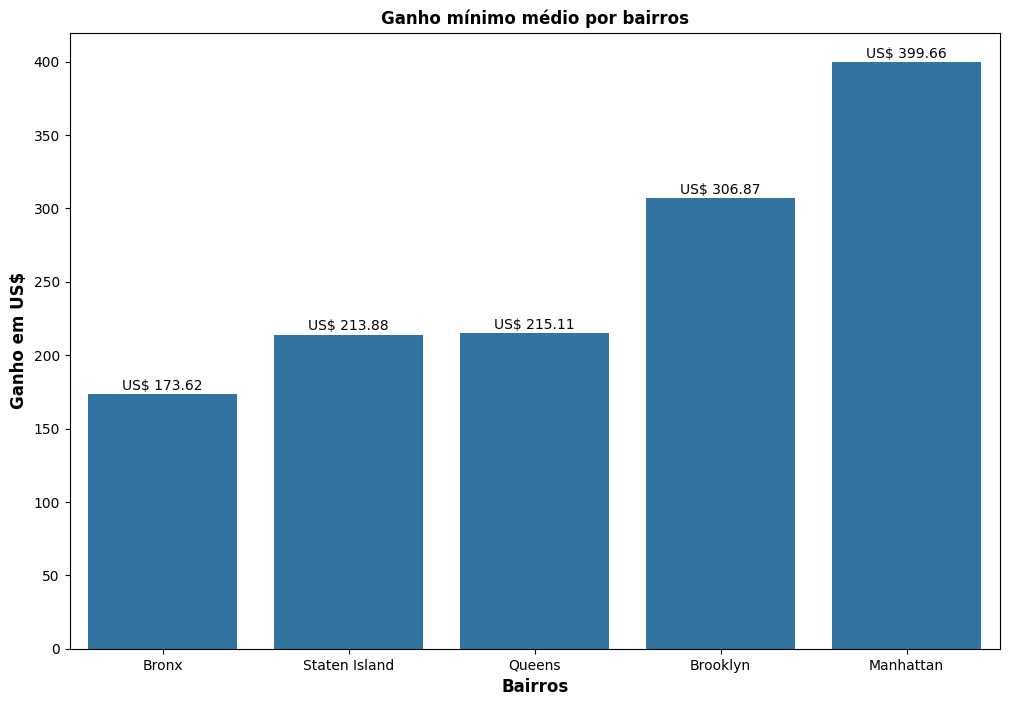

In [49]:
# plotando o gráfico de ganho mínimo 


plt.figure(figsize=(12,8))
sns.barplot(x=ganho_minimo_bairro_medio.index, y=ganho_minimo_bairro_medio.values)
plt.title('Ganho mínimo médio por bairros', fontweight='bold')
plt.xlabel('Bairros', fontsize=12, fontweight='bold')
plt.ylabel('Ganho em US$', fontsize=12, fontweight='bold')

# Adicionando a média acima das barras
for i, value in enumerate(ganho_minimo_bairro_medio.values):
    plt.text(i, value + 1,  # Posição no eixo x e y (+1 para ajustar acima da barra)
             f'US$ {value:0.02f}',  
             ha='center', va='bottom', fontsize=10)  

plt.show()

- Para estimar o ganho mínimo anual vamos considerar a variável ganho_minimo_bairro_medio e multiplicar pelo número de reviews que cada anúncio recebeu. 
- Vale destacar que essa nova variável será uma estimativa de ganho mínimo anual, pois nem todos os usuários realizam reviews após alugar um imóvel, porém todo reviews é em resposta a um usuário que alugou o imóvel. 

In [50]:
# criando a variável ganho_minimo_anual 

newdata['ganho_minimo_anual'] = newdata['price'] * newdata['minimo_noites'] * newdata['numero_de_reviews']


In [51]:
ganho_minimo_anual_medio = newdata.groupby('bairro_group')['ganho_minimo_anual'].mean().sort_values()
ganho_minimo_anual_medio

bairro_group
Bronx            4308.005572
Queens           4924.260498
Staten Island    5931.043605
Brooklyn         7193.923183
Manhattan        8339.423524
Name: ganho_minimo_anual, dtype: float64

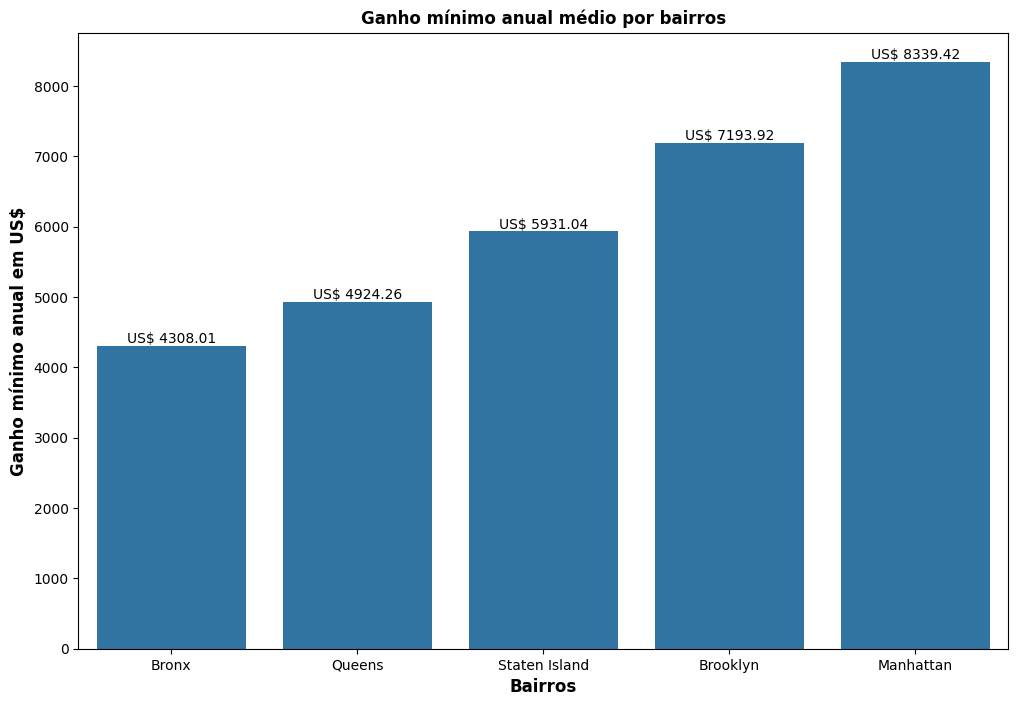

In [52]:
# plotando o gráfico de ganho mínimo anual médio


plt.figure(figsize=(12,8))
sns.barplot(x=ganho_minimo_anual_medio.index, y=ganho_minimo_anual_medio.values)
plt.title('Ganho mínimo anual médio por bairros', fontweight='bold')
plt.xlabel('Bairros', fontsize=12, fontweight='bold')
plt.ylabel('Ganho mínimo anual em US$', fontsize=12, fontweight='bold')

# Adicionando a média acima das barras
for i, value in enumerate(ganho_minimo_anual_medio.values):
    plt.text(i, value + 1,  # Posição no eixo x e y (+1 para ajustar acima da barra)
             f'US$ {value:0.02f}',  
             ha='center', va='bottom', fontsize=10)  

plt.show()

- Vamos verificar como se correlacionam os bairros e seu ganho mínimo médio anual com o tipo de quarto disponível. 

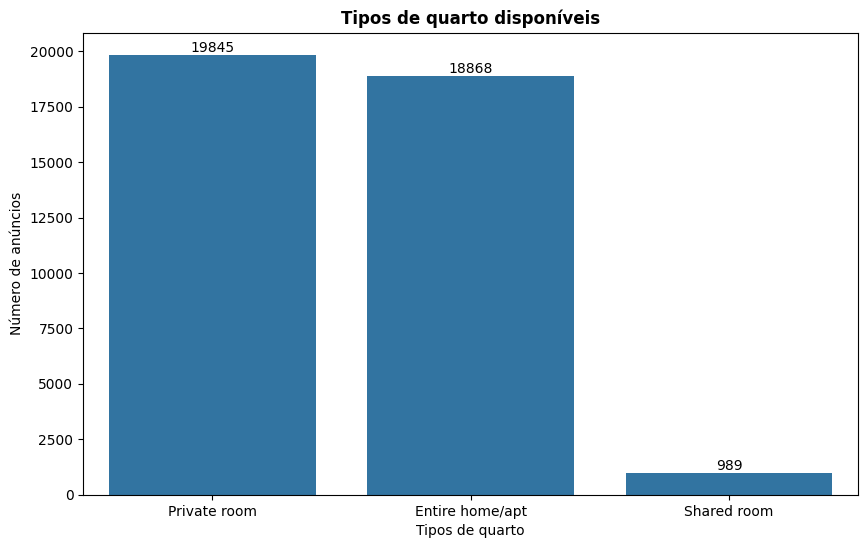

In [53]:
#  Identificando, de maneira geral, a disponibilidade de tipos de quartos disponíveis. 

quantidade_quartos = newdata['room_type'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=quantidade_quartos.index, y=quantidade_quartos.values)
plt.title('Tipos de quarto disponíveis', fontsize=12, fontweight='bold')
plt.xlabel('Tipos de quarto')
plt.ylabel('Número de anúncios')

# Adicionando a média acima das barras
for i, value in enumerate(quantidade_quartos.values):
    plt.text(i, value + 1,  # Posição no eixo x e y (+1 para ajustar acima da barra)
             f'{value}',  
             ha='center', va='bottom', fontsize=10)  

plt.show()

In [54]:
# identificando os tipos de quartos por bairro 

room_type_por_bairro = pd.crosstab(newdata['bairro_group'],newdata['room_type'])
room_type_por_bairro

room_type,Entire home/apt,Private room,Shared room
bairro_group,,,
Bronx,334,618,56
Brooklyn,7965,9042,326
Manhattan,8557,7017,418
Queens,1855,2990,180
Staten Island,157,178,9


- Criando um mapa de calor para apresentar a disposição dos melhores faturamentos de acordo com cada bairro.

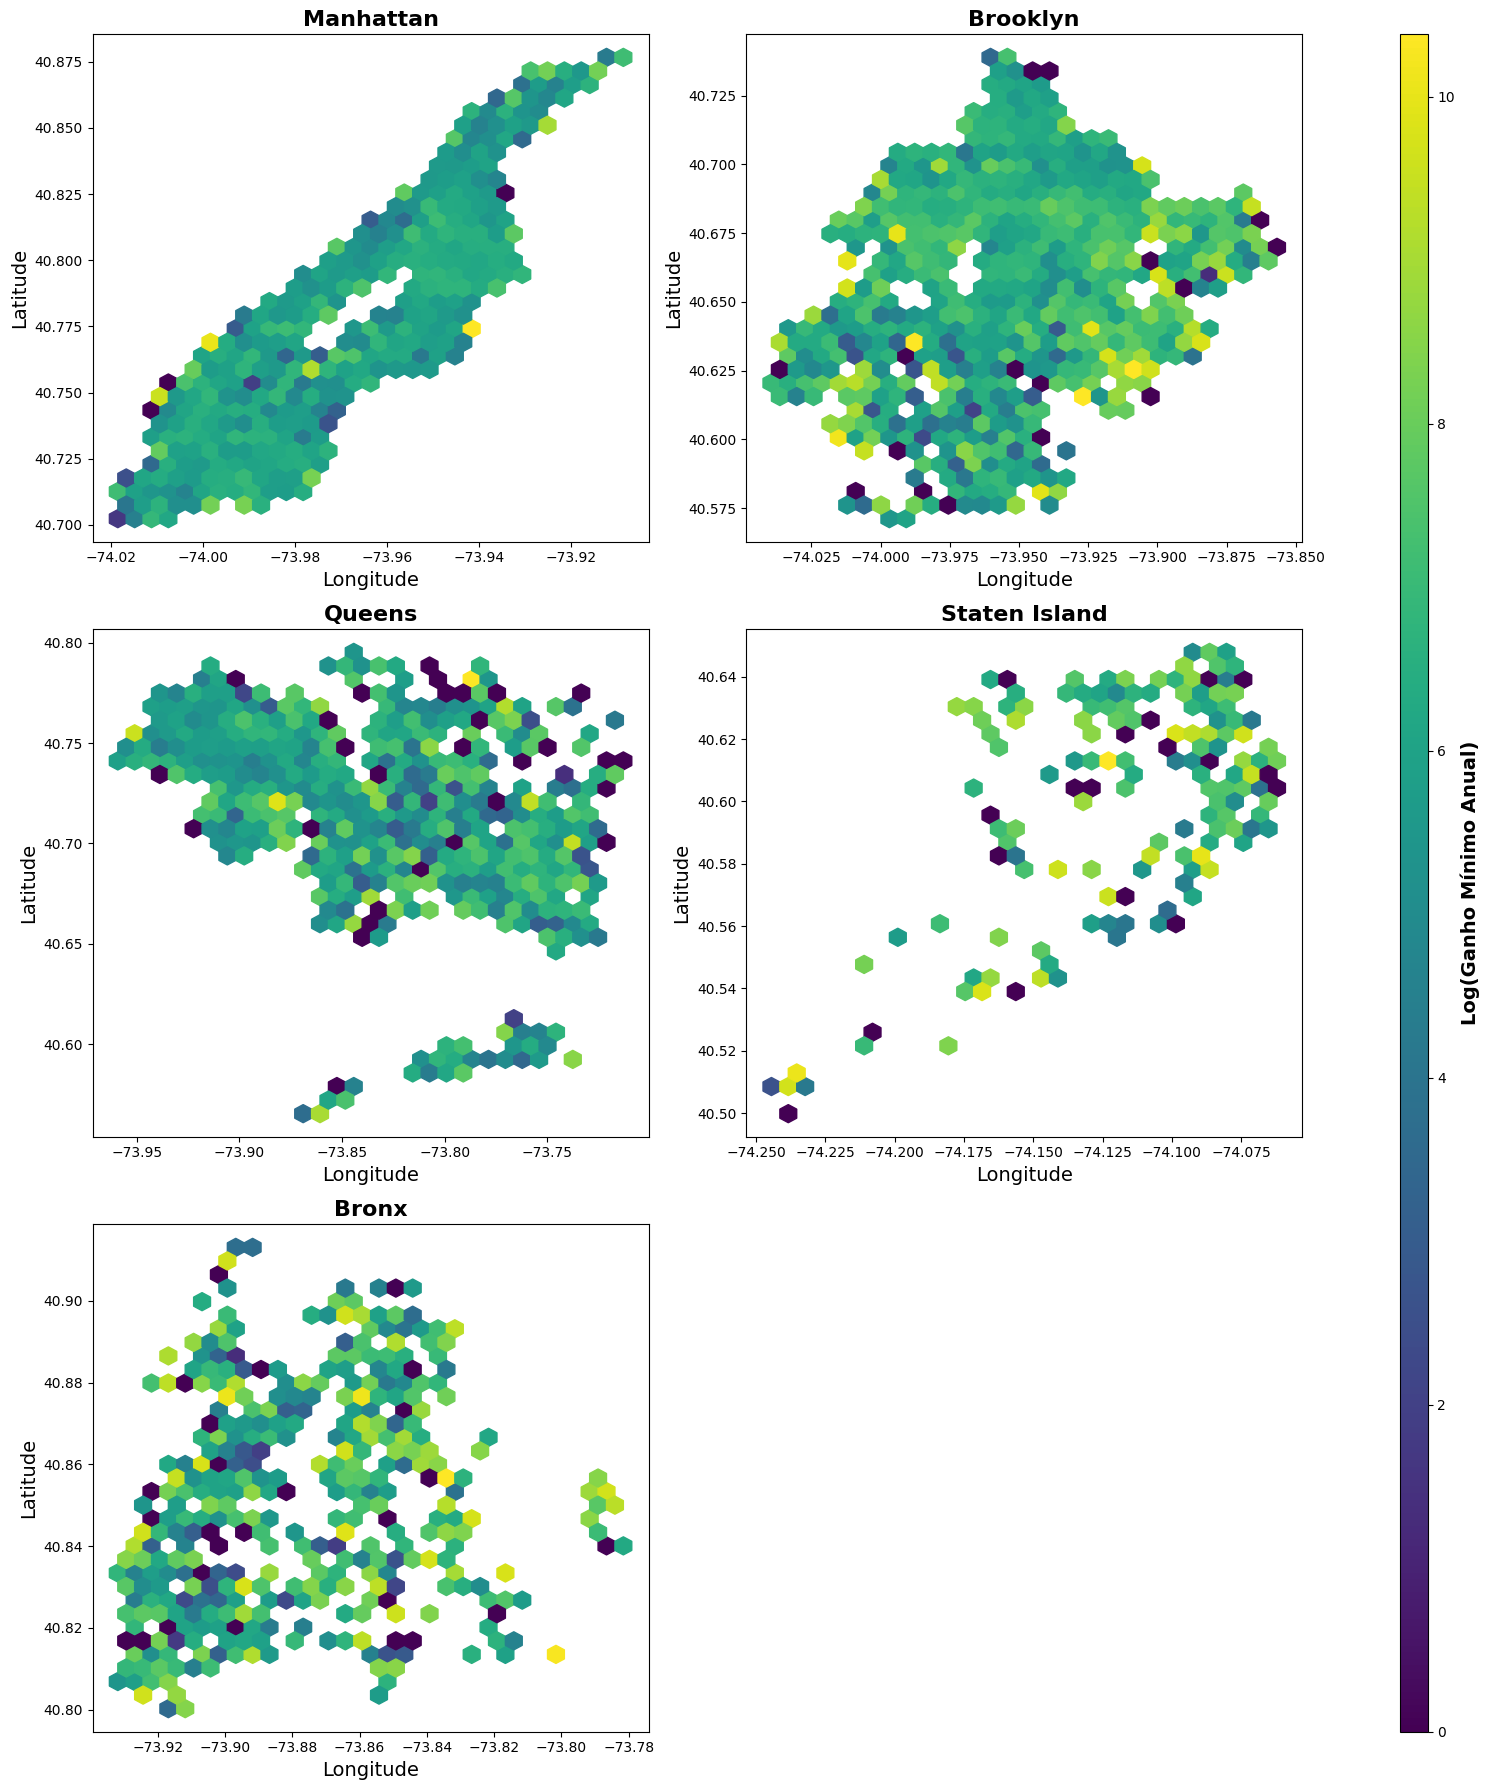

In [55]:
# Ganho mínimo distribuído por latitude e longitude

import numpy as np
import matplotlib.gridspec as gridspec


# transformação logaritmica (adicionado depois)
newdata['log_ganho_minimo_anual'] = np.log1p(newdata['ganho_minimo_anual'])

# plot do mapa de calor 
unique_bairros = newdata['bairro_group'].unique()
n_bairros = len(unique_bairros)

fig = plt.figure(figsize=(15,18))
espectro = gridspec.GridSpec(3,3, width_ratios=[1,1,0.05])

# subplots
axes = [fig.add_subplot(espectro[i // 2, i % 2]) for i in range(n_bairros)]

for ax, bairro in zip(axes, unique_bairros):
    # Filtrar os dados por bairro
    bairro_data = newdata[newdata['bairro_group'] == bairro]

    # Criar o heatmap com hexbin
    hb = ax.hexbin(
        bairro_data['longitude'],
        bairro_data['latitude'],
        C=bairro_data['log_ganho_minimo_anual'],
        gridsize=30,
        cmap='viridis',
        reduce_C_function=np.mean
    )
    
    # rótulos
    ax.set_title(f'{bairro}', fontsize=16, fontweight='bold')
    ax.set_xlabel('Longitude', fontsize=14)
    ax.set_ylabel('Latitude', fontsize=14)

# Posição da barra de cores 
cbar_ax = fig.add_subplot(espectro[:, -1])  
cbar = fig.colorbar(hb, cax=cbar_ax)
cbar.ax.set_ylabel('Log(Ganho Mínimo Anual)', fontsize=14, fontweight='bold')
cbar.ax.tick_params(labelsize=10)

# Ajuste layout 
plt.tight_layout()
plt.show()

- É aplicado uma escala logarítmica para melhor visualização dos dados. 
- O bairro de Manhattan possui uma distribuição homogênea de cores dentro do mapa de calor. Isso indica que o ganho dos anúncios dessa região tendem a ser mais homogêneos mesmo que em pontos diferentes de Manhattan. 
- O mesmo não ocorre em bairros como Brooklyn, Bronx e Staten Island. O gráfico de calor mostra uma distribuição mais heterogênea de cores, representando que, dentro dessas regiões, os ganhos sofrem variações mais expressiva de acordo com a localidade exata do imóvel. 

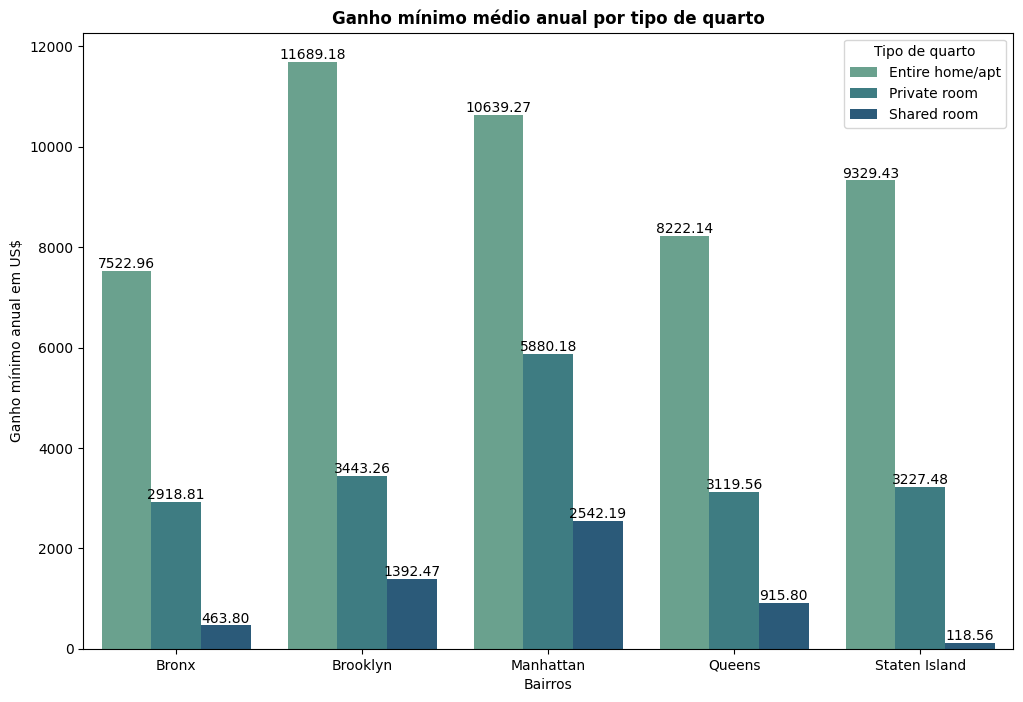

In [56]:
# Ganho mínimo anual por bairro e tipo de quarto 

bairro_quarto_ganho_medio_anual = newdata.groupby(['bairro_group','room_type'])['ganho_minimo_anual'].mean()

# transformando em tabela pivot 
bairro_quarto_ganho_medio_anual_tab = bairro_quarto_ganho_medio_anual.reset_index().pivot(index='bairro_group', columns='room_type', values='ganho_minimo_anual')
grupamento_bairro_ganho = bairro_quarto_ganho_medio_anual_tab.reset_index().melt(id_vars='bairro_group',var_name='room_type',value_name='ganho_minimo_anual')

# viasualizando em formato de gráfico 
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=grupamento_bairro_ganho, x='bairro_group', y='ganho_minimo_anual', hue='room_type',ax=ax,palette='crest')

# Adicionando a média acima das barras
for p in ax.patches:
    if p.get_height() > 0: 
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10)  
        
plt.title('Ganho mínimo médio anual por tipo de quarto', fontsize=12, fontweight='bold')
plt.xlabel('Bairros')
plt.ylabel('Ganho mínimo anual em US$')
plt.legend(title='Tipo de quarto')

plt.show()
  

- O bairro de Manhattan, apresenta o maior *somatório* de ganho mínimo anual médio estimado.

- Em todos os bairros a maior receita é gerada por anúncios de quartos inteiros. E, apesar de Manhattan ser a região mais rentável no somatório dos ganhos, o bairro do Brooklyn possui a maior receita anual em quartos inteiros. 

- O bairro de Staten Island surpreende com a terceira maior receita (principalmente em quartos inteiros), superando bairros como Bronx e Queens. Isso possivelmente se dá devido ao menor número de anúncios, gerando uma menor concorrência. Apesar disso, em Staten Island quartos compartilhados são a opção menos lucrativa e praticamente inviáveis.
    
- Para compreender melhor esses dados, vamos fazer uma análise de correlação. 

### 1.4. Análise de correlação linear (Correlação de Pearson)

Para fazer análise da correlação linear vamos transformar as variáveis categóricas 'bairro_group' e 'room_type' em variáveis numéricas.

In [57]:
# Conversão das variáveis categóricas em variáveis numéricas

data_correlacao = newdata.copy()
data_correlacao.drop(columns=['log_ganho_minimo_anual'], inplace=True)
data_correlacao = pd.get_dummies(data_correlacao, columns=['bairro_group'])
data_correlacao = pd.get_dummies(data_correlacao, columns=['room_type'])

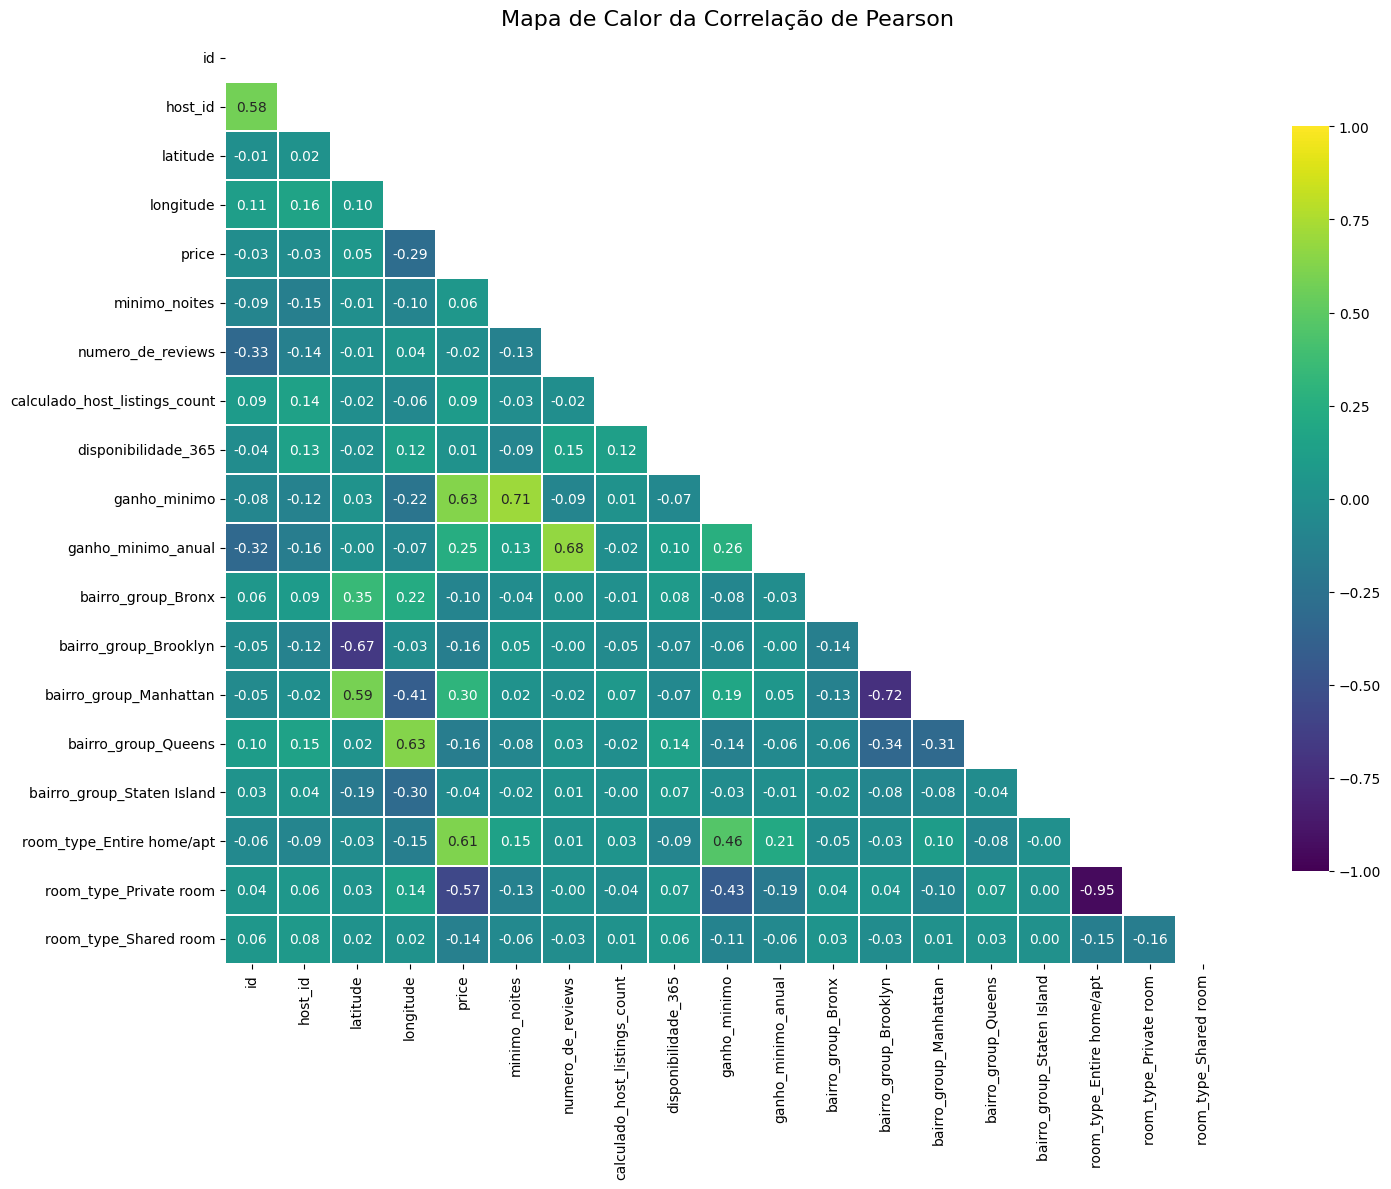

In [58]:
# Criação da matriz de correção de Pearson 

pearson_correlacao = data_correlacao.corr(method='pearson', numeric_only=True)

mascara_p = np.zeros_like(pearson_correlacao, dtype=bool)  
mascara_p[np.triu_indices_from(mascara_p)] = True

# Mapa de calor
plt.figure(figsize=(15, 12))
sns.heatmap(
    pearson_correlacao, 
    mask=mascara_p,  
    annot=True,  
    fmt=".2f",  
    cmap='viridis', 
    cbar_kws={'shrink': 0.8},  
    vmin=-1, vmax=1,
    center=0,  linewidths=.1
)
plt.title('Mapa de Calor da Correlação de Pearson', fontsize=16)
plt.tight_layout()
plt.show()

O que os resultados da correlação de Pearson no mapa de calor nos mostra: 

- Determinando `price` como variável alvo, podemos concluir: 

    - Preço e tipo de **'room_type'** entire room/apt possuem alta correlação linear (0.61) indicando que essa modalidade leva a diárias de preço mais elevados. Se  compararmos com  private rooms e shared rooms, onde a correlação linear negativa desses tipos de quarto e respectivamente de -0.57 e -0.14.

    - Preço e **'bairro_gruop'** Manhattan possuem uma boa correlação linear (0.30) corroborando com os resultados anteriores que descrevem Manhattan como o 'bairro_group' com maior número de anúncios. 

    - Preço e **'número_de_reviews'** possuem uma fraca correlação linear negativa (-0.2). Isso pode sugerir que anúncios mais baratos tendem a receber mais avaliações, possivelmente porque são mais acessíveis a um maior número de viajantes e, consequentemente, têm maior taxa de ocupação..



- Determinando **'minimo_noites'** como variável alvo: 

    - A variável **'minimo_noites'** apresentou uma correlação linear positiva, porém muito fraca com a variável 'price'.
    - A variável **'minimo_moites'** não apresentou forte correlação linear com nenhuma outra variável. 

- Determinando 'disponibilidade_365' como variável alvo: 

    - A variável **'disponibilidade_365'** não apresenta forte correlação linear com as demais variáveis. Existe uma correlação positiva fraca com as variáveis número_de_reviews (0.09), sugerindo que propriedades com maior disponibilidade recebem mais reservas e, consequentemente, mais reviews.


A correlação de Pearson mede apenas relações lineares entre as variáveis. Ou seja, ainda não podemos descartar completamente as hipóteses de que 'minimo_noites' e 'disponibilidade_365' exercem influência no preço do aluguel dos imóveis. 

Para aprofundar um pouco mais a análise e conseguir responder as perguntas iniciais com maior precisão estatística, vamos realizar alguns realizar uma análise de correlação não linear para as variáveis 'minimo_noite' e 'disponibilidade_365'. 

### 1.5. Análise de correlção não linear (Correlação de Spearman)

- Os resultados da correlação de Pearson são bastante interessantes, porém a análise de correlação de Spearman poderá nos mostrar se os resultados observados podem ser fruto de um evento aleatório(relação monotônica). 

#### 1.5.1 Correlação de Spearman entre 'price' e 'minimo_noites' 

In [59]:
from scipy.stats import spearmanr

# criando as listas 'price' e 'minimo_noites'

data_preco = newdata['price']
data_min_noites = newdata['minimo_noites']

In [60]:
# Calculndo a correlação de Spearman e o p-valor 

preco_noites_corr_s, preco_noites_p_valor = spearmanr(data_preco,data_min_noites)

print(f'A correlação de Spearmen entre preço e mínimo de noites é: {preco_noites_corr_s}.')
print(f'O p-valor entre preço e mínimo de noites é: {preco_noites_p_valor}.')


A correlação de Spearmen entre preço e mínimo de noites é: 0.11764709010377862.

O p-valor entre preço e mínimo de noites é: 2.395593180610901e-122.

Podemos concluir que:
- De acordo com o resultado da correlação de Spearman **existe uma correlação** entre o preço dos imóveis e o mínimo de noites, porém essa relação é **muito fraca**.
-  O **p-valor extremamente baixo**(<0.05>), nos levando a confirmar que **a relação entre as variáveis não é aleatória**. 
- Como  o p-valor é praticamente zero, então a **correlação observada é estatisticamente significativa, mas não é forte**!

#### 1.5.2. Correlação de Pearson para 'price e 'disponibilidade_365'

In [61]:
# criando a lista de disponibilidade 

data_disponibilidade = newdata['disponibilidade_365']

In [62]:
# Calculando correlação de Spearman e p-valor 
preco_disponibilidade_corr_s, preco_disponibilidade_p_valor = spearmanr(data_preco,data_disponibilidade)

In [63]:
print(f'A correlação de Spearman entre preço e disponibilidade é: {preco_disponibilidade_corr_s}.')
print(f'O p-valor entre preço e disponibilidade é: {preco_disponibilidade_p_valor}.')

A correlação de Spearman entre preço e disponibilidade é: 0.019852764983949556.

O p-valor entre preço e disponibilidade é: 7.621505441950635e-05.

Podemos concluir que: 

- A correlação de Spearman é extremamente próximo de zero, **indicando que não há praticamente nenhuma relação entre preço e disponibilidade**.
- O p-valor é muito pequeno (< 0.05), ou seja, **a relação observada não é aleatória**.
- Assim, **o número de dias que um imóvel está disponível no ano não influencia o preço do anúncio** de forma relevante.

### 1.6 Análise das palavras usadas nos anúncios de alto valor 

- Para essa análise, vamos considerar imóveis de alto valor aqueles possuem valor maior que 75% dos demais anúncios (anúncios que estão localizados no terceiro quartil (q3) da distribuição da preços). 

- TF-IDF (Term Frequency-Inverse Document Frequency) para identificar as palavras mais importantes. TF-IDF é uma técnica usada em Processamento de Linguagem Natural (NLP). Diferente da contagem simples de palavras, ele pondera as palavras levando em conta quantas vezes aparecem no documento e quão raras são nos demais documentos.

In [64]:
# importando bibliotecas necessárias 

from collections import Counter
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /home/apfa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/apfa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/apfa/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [65]:
# identificando anúncios de alto valor 
q3_alto_valor = newdata['price'].quantile(0.75)
anuncio_alto_valor = newdata[newdata['price'] > q3_alto_valor]
anuncio_alto_valor.shape

(9775, 19)

In [66]:
# Separando anúncios que não são de alto valor 
anuncios_menores_alto_valor = newdata[newdata['price'] < q3_alto_valor]
anuncios_menores_alto_valor.shape

(29775, 19)

In [67]:
# Extraindo o nome dos anuncios de alto valor 
nomes_alto_valor = anuncio_alto_valor['nome']

In [68]:
# Extraindo o nome dos anúncios que NÃO são de alto valor 
nomes_baixo_valor = anuncios_menores_alto_valor['nome']

In [69]:
# filtrando e corrigindo a escrita dos nomes 

# Função para processar texto
def processar_texto(textos):
    text = ' '.join(textos).lower() 
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text) 
    filtered_tokens = [w for w in tokens if w not in stop_words] 
    return ' '.join(filtered_tokens)  

# Processando textos 
texto_alto = processar_texto(nomes_alto_valor)
texto_baixo = processar_texto(nomes_baixo_valor)

In [70]:
# Definindo as palavras mais usadas nos anúncios de alto valor 

# lista com todos os nome 
todos_nomes = [texto_alto, texto_baixo] 

# Aplicando TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(todos_nomes) 

# Criando df com os resultados de TF-IDF
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=["alto_valor", "baixo_valor"])

# Identificando palavras mais importantes para anúncios de alto valor
palavras_importantes = df_tfidf.loc["alto_valor"].sort_values(ascending=False)
top_palavras = palavras_importantes.head(20)

# Exibindo as palavras mais relevantes
print(top_palavras)

apartment       0.385588
bedroom         0.345562
apt             0.275516
br              0.253946
studio          0.210584
village         0.204135
spacious        0.189459
east            0.180119
park            0.154547
williamsburg    0.146764
cozy            0.143873
manhattan       0.142094
brooklyn        0.138758
private         0.133644
heart           0.128529
loft            0.126528
luxury          0.119412
west            0.119190
modern          0.118968
beautiful       0.118523
Name: alto_valor, dtype: float64

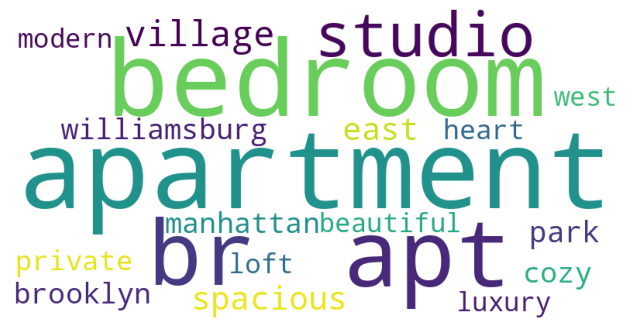

In [107]:
# Apresentando as palavras mais importantes em formato nuvem 

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_palavras)
plt.figure(figsize=(8,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./imagens/wordmap.png')

plt.show()


### 1.7. Resultados da análise exploratória de dados 

#### 1.7.1 <font color='purple'>Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?</font>

**Manhattan é a melhor opção para investimento devido à alta média de preços e à demanda constante.**

Outros insight e estratégias: 

- Investir em Manhattan ou Brooklyn com anúncios de apartamentos inteiros para maximizar o faturamento.
    - **Hipótese:** Bairros centrais e turísticos tendem a ter valores mais elevados devido à maior demanda.


- Brooklyn pode ser uma alternativa interessante, especialmente para apartamentos inteiros, que apresentam alto retorno.

-  Staten Island tem um rendimento médio alto para apartamentos inteiros, possivelmente devido à baixa concorrência, tornando-se uma opção menos óbvia, mas viável.

- Para menores custos iniciais, Staten Island pode ser uma opção devido à concorrência mais baixa.

-  Investidores devem priorizar anúncios de "Entire home/apt", pois geram maior receita média anual em comparação a quartos privados ou compartilhados.
    - **Hipótese:** Anúncios que oferecem espaços inteiros atraem um público disposto a pagar mais, como turistas ou profissionais em viagem.

#### 1.7.2 <font color='purple'>O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?</font>

**A correlação de Pearson e Spearman entre `price` e `minimo_noites` foi fraca, indicando que exigir mais noites mínimas não afeta significativamente o preço do imóvel.**
    
**A correlação entre preço e disponibilidade_365 foi praticamente nula , indicando que a quantidade de dias disponíveis não impacta diretamente o preço do imóvel.**

Outras conclusões: 

- O p-valor de ambos os testes foi extremamente baixo, confirmando que as correlações não são lineares ou aleatórias, mas sim fracas e não possuem impacto relevante.

- Proprietários podem definir livremente o número mínimo de noites sem afetar significativamente o preço.

- A disponibilidade ao longo do ano não influencia o valor do aluguel, reforçando que fatores como localização e tipo de imóvel são mais importantes na precificação.

#### 1.7.3 <font color='purple'>Existe algum padrão no texto do nome do local para lugares de mais alto valor?</font>

A análise utilizando TF-IDF revelou que certas palavras são mais comuns em anúncios de alto valor, incluindo:

**<p align='center'>Palavras descritivas neutras:</p>**

- '*bedroom*', '*apartment*', '*studio*', '*apt*' → usadas amplamente para descrever acomodações.

**<p align='center'>Palavras associadas a locais de alto valor:</p>**

- '*modern*', '*luxury*', '*cozy*', '*spacious*' → anúncios que destacam conforto e exclusividade tendem a ter preços mais altos.

- Proprietários podem melhorar a atratividade e percepção do anúncio utilizando termos que remetam a elementos de conforto, exclusividade e sofisticação.

- Estratégias de marketing para anúncios de alto valor devem enfatizar elementos como luxo, espaço e modernidade.

# 2. Modelo de precificação 

**O objetivo do modelo será estimar o valor da variável alvo `price`.** 

- Como a variável alvo predita será um valor contínuo, trataremos como um problema de Regressão Linear. Logo, o modelo desenvolvido para realizar a predição será um modelo de regressão linear simples. 

- A avaliação do modelo será feita por métricas de performance. Adotaremos: raiz quadrada do erro-médio, coeficiente de determinação e erro médio absoluto. 

### 2.1. Regressão Linear Simples

In [72]:
data_correlacao.head()

,id,nome,host_id,host_name,bairro,latitude,longitude,price,minimo_noites,numero_de_reviews,...,ganho_minimo,ganho_minimo_anual,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225.0,1,45,...,225.0,10125.0,False,False,True,False,False,True,False,False
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,150.0,3,0,...,450.0,0.0,False,False,True,False,False,False,True,False
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89.0,1,270,...,89.0,24030.0,False,True,False,False,False,True,False,False
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80.0,10,9,...,800.0,7200.0,False,False,True,False,False,True,False,False
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Murray Hill,40.74767,-73.97500,200.0,3,74,...,600.0,44400.0,False,False,True,False,False,True,False,False


Baseado no resultado das análises de correlação, algumas variáveis serão removidas.

In [73]:
# Removendo variáveis
data_modelo = data_correlacao.copy()
data_modelo = data_modelo.drop(columns=['id','nome','bairro','calculado_host_listings_count','host_id','host_name','ultima_review','reviews_por_mes','ganho_minimo','ganho_minimo_anual'])
data_modelo.head()

,latitude,longitude,price,minimo_noites,numero_de_reviews,disponibilidade_365,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.75362,-73.98377,225.0,1,45,355.000000,False,False,True,False,False,True,False,False
1,40.80902,-73.94190,150.0,3,0,365.000000,False,False,True,False,False,False,True,False
2,40.68514,-73.95976,89.0,1,270,194.000000,False,True,False,False,False,True,False,False
3,40.79851,-73.94399,80.0,10,9,112.013445,False,False,True,False,False,True,False,False
4,40.74767,-73.97500,200.0,3,74,129.000000,False,False,True,False,False,True,False,False


- As variáveis serão separadas em variável dependente (Y) e variáveis independentes (x).
- Os subconjuntos de treinamento e teste de forma aleatória.
- Percentual: 70% treino e 30% teste. 

In [74]:
# Separando variáveis dependentes e independentes
X = data_modelo.drop(columns=['price'])
Y = data_modelo['price']

In [75]:
# separando conjuntos de teste e treino
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=0) 


In [76]:
# iniciando modelo 

# venho do futuro dizer que outros modelos foram criados, então a variável regressão será renomeada para indicar o modelo 
from sklearn.linear_model import LinearRegression

regressao_slr = LinearRegression()
regressao_slr.fit(x_train,y_train)

LinearRegression()

In [77]:
# Prevendo Y 

y_pred_slr = regressao_slr.predict(x_test)
y_pred_slr

array([ 59.3760516 ,  50.32343428,  86.67800831, ..., 114.2102987 ,
       192.45807854,  99.01002906])

In [78]:
# obtendo R²
r2_slr = regressao_slr.score(x_test,y_test)
print(f'Coeficiente determinação (R²): {r2_slr}')

Coeficiente determinação (R²): 0.4805258646563566

- O R² indica que apenas 48,16% da variabilidade no preço dos imóveis pode ser explicada pelas variáveis independentes do modelo.
- Esse resultado sugere que o modelo não está capturando bem a variabilidade dos preços.

In [79]:
# Calculando erro médio absoluto 
from sklearn.metrics import mean_absolute_error
mae_slr = mean_absolute_error(y_pred_slr,y_test)
print(f'O erro médio absoluto é {mae_slr}.')

O erro médio absoluto é 35.99269091046014.

- O MAE indica que, em média, o modelo erra as previsões em cerca de US$ 35.94 para cada anúncio.
- Para anúncios de 100-200 dólares, esse erro pode ser significativo. 

In [80]:
# calculando Raiz do Erro Quadrático Médio
from sklearn.metrics import mean_squared_error

mse_slr = mean_squared_error(y_pred_slr,y_test)
rmse_slr = np.sqrt(mse_slr)
print(f'A raiz de erro quadrado médio é {rmse_slr}.')



A raiz de erro quadrado médio é 48.540884170357.

- O RMSE penaliza mais os erros grandes. Como o RMSE é US$ 48.48 e significativamente maior que o MAE, isso sugere que há outliers no conjunto de dados que estão afetando a performance do modelo.

### 2.2. Modelo Random Forest

O modelo de regressão linear simples parece não capturar bem a variabilidade dos preços. Para melhorar o desempenho dessa previsão, vamos fazer um modelo de árvore de decisão. 

Esse modelo tem a vantagem de capturar relações não lineares entre as variáveis.

In [81]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

In [82]:
# avaliando desempenho do modelo
from sklearn.metrics import r2_score, mean_absolute_error

# R²
rf_r2 = r2_score(y_test, y_pred_rf)
print(f'Coeficiente determinação (R²): {rf_r2}')

# RMSE
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"RMSE do modelo Random Forest: {rf_rmse}")

# MAE
rf_mae = mean_absolute_error(y_test, y_pred_rf)
print(f'O erro médio absoluto do modelo random forest: {rf_mae}.')

Coeficiente determinação (R²): 0.5412292775316541

RMSE do modelo Random Forest: 45.61666861572333

O erro médio absoluto do modelo random forest: 32.91153189187421.

**Comparação entre modelos**


| Métrica                               | Regressão Linear | Random Forest | Melhoria                                  |
|---------------------------------------|------------------|---------------|-------------------------------------------|
| Coeficiente de Determinação (R²)      | 0.4805           | 0.5412        | Aumentou (mais variabilidade explicada)   |
| RMSE                                  | 48.54            | 45.61         | Diminuiu (erro médio menor)               |
| MAE                                   | 35.99            | 32.91         | Diminuiu (erro médio absoluto menor)      |




### 2.3. Modelo Random Forest Tuned

- Os valores elevados de RMSE indicam que outliers podem estar influenciando esse resultado. 
- Aplicaremos IQR novamente na variável `price` e filtraremos os valores extremos. 
- Um novo modelo será treinado e vamos comparar o desempenho. 

In [83]:
# Aplicando IQR novamente da variável 'price'


q1_correct = data_modelo['price'].quantile(0.25)
q3_correct = data_modelo['price'].quantile(0.75)
iqr_correct = q3_correct - q1_correct

inf_price_correct = q1_correct - 1.5*iqr_correct
sup_price_correct = q3_correct + 1.5*iqr_correct

print(f'Para preço: \n\nPrimeiro Quartil (Q1): {q1_correct}\nTerceiro Quartil (Q3): {q3_correct}\nIntervalo Interquartil (IQR): {iqr_correct}\nLimite superior de price: {sup_price_correct}\nLimite inferior de price: {inf_price_correct}')

Para preço: 

Primeiro Quartil (Q1): 65.0
Terceiro Quartil (Q3): 155.0
Intervalo Interquartil (IQR): 90.0
Limite superior de price: 290.0
Limite inferior de price: -70.0

In [84]:
# Removendo os outliers 

# criando uma nova copia do dataset
df_correcao = data_modelo.copy()

df_correcao.drop(df_correcao[df_correcao.price > sup_price_correct].index, axis=0, inplace=True)

In [85]:
df_correcao['price'].describe()

count    38657.000000
mean       114.006214
std         60.582614
min         10.000000
25%         65.000000
50%        100.000000
75%        150.000000
max        290.000000
Name: price, dtype: float64

In [86]:
data_modelo['price'].describe()

count    39702.000000
mean       119.028921
std         67.155222
min         10.000000
25%         65.000000
50%        100.000000
75%        155.000000
max        334.000000
Name: price, dtype: float64

In [87]:
# separando as variáveis do novo dataset 

X_c = df_correcao.drop(columns=['price'])
Y_c = df_correcao['price']

# Garantir que os índices de X e Y estão alinhados
X_c = X_c.reset_index(drop=True)
Y_c = Y_c.reset_index(drop=True)

# Separando os subconjuntos de treinamento e teste de forma aleatória
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(X_c, Y_c, test_size=0.30, random_state=0)

In [88]:
# inicializando o novo modelo de random forest

rf_model_tuned = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_tuned.fit(X_train_c, Y_train_c)
y_pred_rf_tuned = rf_model_tuned.predict(X_test_c)

In [89]:
# recalculando as métricas

# R²
rf_r2_2 = r2_score(Y_test_c, y_pred_rf_tuned)
print(f'Coeficiente determinação (R²): {rf_r2_2}')

# RMSE
rf_rmse_2 = np.sqrt(mean_squared_error(Y_test_c, y_pred_rf_tuned))
print(f"RMSE do modelo Random Forest: {rf_rmse_2}")

# MAE
rf_mae_2 = mean_absolute_error(Y_test_c, y_pred_rf_tuned)
print(f'O erro médio absoluto do modelo random forest: {rf_mae_2}.')

Coeficiente determinação (R²): 0.5577157264138223

RMSE do modelo Random Forest: 40.33528359786806

O erro médio absoluto do modelo random forest: 29.562958022928722.

### 2.4 Modelo XGBoost

In [90]:
from xgboost import XGBRegressor

# Vamos usar os mesmos subconjuntos de treino e teste que usamos na random forest 2 

# Definição dos hiperparâmetros a serem testados (esperamos melhorar o modelo redefinindo alguns hiperparâmetros)

from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],  
    'learning_rate': [0.01, 0.1, 0.2],  
    'max_depth': [4, 6, 8],  
    'subsample': [0.8, 1.0], 
    'colsample_bytree': [0.8, 1.0]  
}

# Aplicando GridSearchCV para buscar os melhores hiperparâmetros
grid_search = GridSearchCV(
    XGBRegressor(random_state=42),
    param_grid,
    cv=5,  
    scoring='neg_mean_squared_error',  # para otimizando para erro quadrático médio
    n_jobs=-1  # Utilizando todos os núcleos disponíveis
)

# Treinando com GridSearch
grid_search.fit(X_train_c, Y_train_c)

# Exibir melhores parâmetros encontrados
print("Melhores parâmetros encontrados:", grid_search.best_params_)


Melhores parâmetros encontrados:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}

In [91]:
# Pegando os melhores hiperparâmetros do GridSearchCV
best_params = grid_search.best_params_

# Criando um novo modelo XGBoost com os melhores hiperparâmetros
xgb_model_tuned = XGBRegressor(**best_params, random_state=42)

# Treinando o modelo otimizado
xgb_model_tuned.fit(X_train_c, Y_train_c)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [92]:
# Fazendo previsões no conjunto de teste
y_pred_xgb = xgb_model_tuned.predict(X_test_c)

In [93]:
# Calculando métricas de avaliação
r2_xgb = r2_score(Y_test_c, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(Y_test_c, y_pred_xgb))
mae_xgb = mean_absolute_error(Y_test_c, y_pred_xgb)

# Exibindo os resultados
print(f"Coeficiente de Determinação (R²): {r2_xgb:.4f}")
print(f"RMSE do modelo: {rmse_xgb:.4f}")
print(f"Erro Médio Absoluto (MAE): {mae_xgb:.4f}")

Coeficiente de Determinação (R²): 0.5773

RMSE do modelo: 39.4334

Erro Médio Absoluto (MAE): 28.9578

### 2.5. Comparação entre Modelos

| **Métrica**                           | **Regressão Linear** | **Random Forest** | **Random Forest Ajustada** | **XGBoost** | **Melhoria**                                      |
|---------------------------------------|----------------------|-------------------|-------------------|------------|--------------------------------------------------|
| **Coeficiente de Determinação (R²)**  | 0.4805               | 0.5412            | 0.5577            | **0.5773** | Aumentou ainda mais (modelo explica melhor a variabilidade) |
| **RMSE**                              | 48.54                | 45.61             | 40.33             | **39.43**  | Diminuiu significativamente (erro médio menor)  |
| **MAE**                               | 35.99                | 32.91             | 29.56             | **28.95**  | Diminuiu ainda mais (erro médio absoluto menor) |



Dentre os quatro modelos testados, o modelo de XGBoost com ajuste de hiperparâmetros mostrou o melhor desempenho. Usaremos os resultados do Modelo XGBoost para fazer a previsão. 

### 2.6. Previsão 

Faremos a previsão da variável `price`para um imóvel com as seguintes características: 

| Atributo                         | Valor                     |
|----------------------------------|---------------------------|
| **ID**                           | 2595                      |
| **Nome**                         | Skylit Midtown Castle     |
| **Host ID**                      | 2845                      |
| **Host Name**                    | Jennifer                  |
| **Bairro Group**                 | Manhattan                 |
| **Bairro**                       | Midtown                   |
| **Latitude**                     | 40.75362                  |
| **Longitude**                    | -73.98377                 |
| **Room Type**                    | Entire home/apt           |
| **Mínimo de Noites**             | 1                         |
| **Número de Reviews**            | 45                        |
| **Última Review**                | 2019-05-21                |
| **Reviews por Mês**              | 0.38                      |
| **Calculado Host Listings Count** | 2                         |
| **Disponibilidade (365 dias)**    | 355                       |



In [94]:
# Adaptando os dados do imóvel para previsão

dados_imovel = novo_dado = {'latitude': 40.75362,
            'longitude': -73.98377,
            'minimo_noites': 1,
            'numero_de_reviews': 45,
            'disponibilidade_365': 355,
            'bairro_group_Bronx': 0,
            'bairro_group_Brooklyn': 0,
            'bairro_group_Manhattan': 1,
            'bairro_group_Queens': 0,
            'bairro_group_Staten Island': 0,
            'room_type_Entire home/apt': 1,
            'room_type_Private room': 0,
            'room_type_Shared room': 0}

In [95]:
# Criando um dataframe com os dados do imóvel 

df_imovel = pd.DataFrame([dados_imovel])

In [96]:
# Previsão do modelo 
preco_xgb = xgb_model_tuned.predict(df_imovel)
print('Preço previsto por XGBoost: US$', preco_xgb[0])
preco_xgb = preco_xgb[0]

Preço previsto por XGBoost: US$ 188.8011

- O modelo de XGBoost previu um preço de **US$ 188,80** para o imóvel descrito. 


Comparando a previsão de preço com os demais modelos

In [98]:
# Fazendo a previsão de preço para todos os modelos 

preco_slr = regressao_slr.predict(df_imovel)
print('Preço previsto por Regressão Linear: US$', preco_slr[0])
preco_slr = preco_slr[0]

preco_rf = rf_model.predict(df_imovel)
print('Preço previsto por Random Forest: US$', preco_rf[0])
preco_rf = preco_rf[0]

preco_rf2 = rf_model_tuned.predict(df_imovel)
print('Preço previsto por Random Forest Tuned: US$', preco_rf2[0])
preco_rf2 = preco_rf2[0]

print('Preço previsto por XGBoost: US$', preco_xgb)


Preço previsto por Regressão Linear: US$ 200.6149953488566

Preço previsto por Random Forest: US$ 222.92

Preço previsto por Random Forest Tuned: US$ 202.82

Preço previsto por XGBoost: US$ 188.8011

Lembrando que, apesar do modelo de regressão linear e random forest preverem valores mais elevados de preço, esse modelos não tiveram os melhores resultados nos parâmetros de avaliação, ou seja, não capturaram tão bem a implicação das demais variáveis na variável `price`. 

Esse é um dado importante pois, precificar um apartamento acima do padrão do mercado levaria usuários da plataforma a escolherem outros apartamentos no mesmo padrão, porém com preços mais regulares. 

In [99]:
# Salvando o modelo em formato pickles 

import pickle
import os

# Local 

folder_path = '../model'  # Caminho para a pasta
file_name = 'model.pkl'
full_path = os.path.join(folder_path, file_name) 
os.makedirs(folder_path, exist_ok=True) 

# Salvando

modelo_treinado_xgb = xgb_model_tuned
with open(full_path, 'wb') as file:
    pickle.dump(modelo_treinado_xgb, file)

print(f"Modelo salvo em: {full_path}")

Modelo salvo em: ../model/model.pkl

# 3. Perspectiva de ganho 

Bom, mas como podemos traduzir os dados analisados e o resultado do modelo em uma perspectiva de faturamento anual do cliente?

Vamos estimar o faturamento total do cliente em um ano de acordo com a ocupação do imóvel.

Faremos um percentual de ocupação de 25%, 50%, 75%, 90% e 100% dos dias que o cliente deixou seu imóvel disponível para aluguel.


In [100]:
# Criando a função de cálculo de faturamento estimado 

def calcular_faturamento_anual(preco_previsto, dias_disponiveis):
    """
    Calcula o faturamento anual estimado para diferentes taxas de ocupação.

    Parâmetros:
    - preco_previsto: float -> Preço previsto pelo modelo.
    - dias_disponiveis: int -> Número de dias disponíveis no ano para aluguel.

    Retorna:
    - Um dicionário com as taxas de ocupação e seus respectivos faturamentos.
    """
    
    # taxas de ocupação
    taxas_ocupacao = [0.25, 0.50, 0.75, 0.90, 1.00]  

    # Faturamento estimado para cada taxa de ocupação
    faturamento_estimado = {f"{int(taxa*100)}%": preco_previsto * dias_disponiveis * taxa for taxa in taxas_ocupacao}

    # resultados 
    print("\nEstimativa de faturamento anual para diferentes taxas de ocupação:")
    for ocupacao, faturamento in faturamento_estimado.items():
        print(f"Ocupação de {ocupacao}: US$ {faturamento:.2f}")

    return faturamento_estimado

Vamos considerar a previsão de preço do imóvel do modelo xgb e os dias disponíveis para locação.

In [101]:
# estimando faturamento anual
calcular_faturamento_anual(preco_previsto=preco_xgb,dias_disponiveis=355)

Estimativa de faturamento anual para diferentes taxas de ocupação:

Ocupação de 25%: US$ 16756.10

Ocupação de 50%: US$ 33512.20

Ocupação de 75%: US$ 50268.29

Ocupação de 90%: US$ 60321.95

Ocupação de 100%: US$ 67024.39

{'25%': np.float32(16756.098),
 '50%': np.float32(33512.195),
 '75%': np.float32(50268.293),
 '90%': np.float32(60321.95),
 '100%': np.float32(67024.39)}

In [102]:
# Considerando o erro médio absoluto vamos calcular a faixa de faturamento 
def faixa_faturamento_anual(preco_previsto, dias_disponiveis, erro_medio_absoluto):
    """
    Calcula a faixa de faturamento anual estimado para diferentes taxas de ocupação.

    Parâmetros:
    - preco_previsto: float -> Preço previsto pelo modelo.
    - dias_disponiveis: int -> Número de dias disponíveis no ano para aluguel.
    - erro_medio_absoluto: float -> erro de previsão 

    """
    
    # taxas de ocupação
    taxas_ocupacao = [0.25, 0.50, 0.75, 0.90, 1.00]

    # Armazenar os valores de faturamento
    faixa_faturamento = {}
    fat_med = []
    fat_min = []
    fat_max = []

    # Iterando pelas taxas de ocupação para calcular os valores mínimo, médio e máximo
    for taxa in taxas_ocupacao:
        ocupacao_percentual = f"{int(taxa * 100)}%"
        faturamento_medio = preco_previsto * dias_disponiveis * taxa
        faturamento_min = (preco_previsto - erro_medio_absoluto) * dias_disponiveis * taxa
        faturamento_max = (preco_previsto + erro_medio_absoluto) * dias_disponiveis * taxa
        fat_med.append(faturamento_medio)
        fat_min.append(faturamento_min)
        fat_max.append(faturamento_max)

        faixa_faturamento[ocupacao_percentual] = {
            "Médio": faturamento_medio,
            "Mínimo": faturamento_min,
            "Máximo": faturamento_max
        }
    
    df_fat = pd.DataFrame({
    'taxas_ocupacao': taxas_ocupacao,
    'faturamento_medio': fat_med,
    'faturamento_minimo': fat_min,
    'faturamento_max': fat_max})
    
    
    return faixa_faturamento, df_fat



In [103]:
# calculando a taxa para a com os resultados de xgboost
faixa_faturamento_anual, df_fat = faixa_faturamento_anual(preco_previsto=preco_xgb,dias_disponiveis=355,erro_medio_absoluto=mae_xgb)

In [104]:
# Faturamento estimado para diferentes taxas de ocupação
df_fat

,taxas_ocupacao,faturamento_medio,faturamento_minimo,faturamento_max
0,0.25,16756.097656,14186.096218,19326.099331
1,0.50,33512.195312,28372.192436,38652.198662
2,0.75,50268.292969,42558.288654,57978.297993
3,0.90,60321.949219,51069.946384,69573.957592
4,1.00,67024.390625,56744.384872,77304.397324


<Figure size 640x480 with 0 Axes>

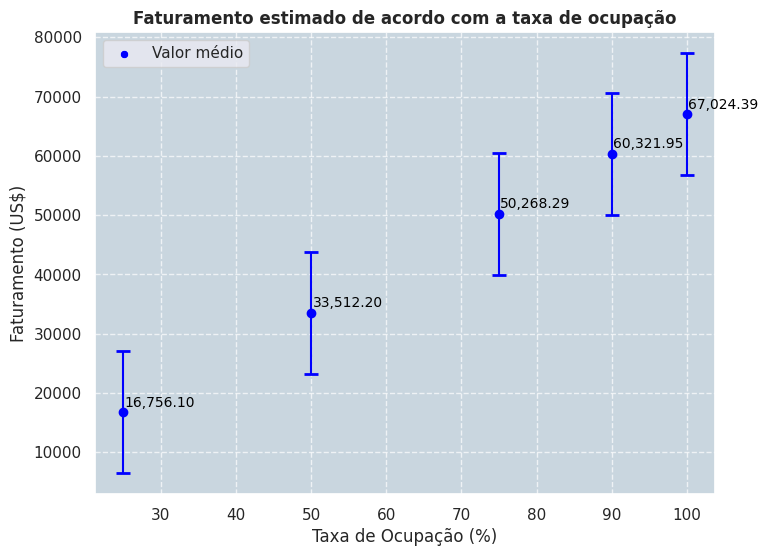

In [106]:
# Estilo de gráfico
sns.set(style="darkgrid")
sns.despine()


# erro acumulado
erro_acumulado_mae = np.full(len(df_fat), 355 * mae_xgb)  # Garantir array do mesmo tamanho

plt.figure(figsize=(8,6))

# dispersão com barras de erro
sns.scatterplot(x=df_fat['taxas_ocupacao'] * 100, 
                y=df_fat['faturamento_medio'], 
                color='blue', label="Faturamento Médio")


plt.errorbar(df_fat['taxas_ocupacao'] * 100, 
             df_fat['faturamento_medio'], 
             yerr=erro_acumulado_mae, 
             fmt='o', capsize=5, capthick=2, elinewidth=1.5, color='blue')

# Valores no gráfico
for i, txt in enumerate(df_fat['faturamento_medio']):
    plt.annotate(f"{txt:,.02f}", 
                 (df_fat['taxas_ocupacao'].iloc[i] * 100, df_fat['faturamento_medio'].iloc[i]), 
                 textcoords="offset points", 
                 xytext=(1,7), 
                 ha='left', va='center', fontsize=10, color='black')

plt.xlabel("Taxa de Ocupação (%)")
plt.ylabel("Faturamento (US$)")
plt.legend(["Valor médio"])
plt.title("Faturamento estimado de acordo com a taxa de ocupação", fontweight='bold')
plt.gca().set_facecolor('#c9d6df')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('./imagens/faturamento_final.png')
plt.show()


O gráfico mostra a relação entre a taxa de ocupação (%) e o faturamento médio estimado (US$). Cada ponto representa o faturamento médio para uma determinada taxa de ocupação, enquanto as barras de erro indicam a variação esperada nos valores (mínimo e máximo).

# 4. Resumo final

Este projeto teve como objetivo precificar um imóvel disponível para aluguel na cidade de Nova York, utilizando análise exploratória de dados, estatísticas descritivas e modelos de machine learning.

Além da precificação, algumas perguntas foram respondidas:</br>
</br>
🔹Qual o melhor bairro para investir? </br>
🔹O número mínimo de noites e a disponibilidade afetam o preço? </br>
🔹Existem padrões nos anúncios de imóveis mais caros? </br>

**1. Princicapis etapas**

**Tratamento de dados:** remoção de valores nulos, duplicatas e outliers.
**Análise estatística:** identificação de padrões, correlações e tendências.
**Engenharia de variáveis:** criação de novas métricas para melhor entendimento do faturamento.


Modelagem e Precificação</br>
Foram testados três modelos de machine learning:</br>
**Regressão Linear** → Simples, mas com baixa capacidade de captura de padrões complexos.</br>
**Random Forest** → Melhorou os resultados, mas ainda apresentava alto erro médio.</br>
**XGBoost (modelo final)** → Melhor desempenho entre os modelos testados.</br>

📌 Melhor modelo: XGBoost </br>
📌 Preço previsto para o imóvel: US$ 188,81 </br>
📌 Erro médio do modelo (MAE): ± US$ 28,95 </br>
📌 Faixa de preço estimada: US$ 159,86 - US$ 217,76 </br>

**2. Resultados e Insights Estratégicos**


🔹 Melhor bairro para investimento:</br></br>
📌**Manhattan** → Maior faturamento e menor variabilidade de ganhos. </br>

Brooklyn → Alternativa viável, especialmente para imóveis inteiros.</br>
Staten Island → Baixa concorrência, mas menor demanda.</br>

🔹 **O número mínimo de noites interfere no preço?**</br>

Não há correlação significativa entre preço e mínimo de noites.
Proprietários podem definir livremente essa variável sem impactar diretamente o valor do aluguel.

🔹 **Disponibilidade ao longo do ano afeta o preço?**</br>

O número de dias disponíveis no ano não tem influência direta no preço do imóvel.
Fatores como localização e tipo de imóvel são mais determinantes para a precificação.
🔹 Existe um padrão no nome dos anúncios mais caros?
Sim! Palavras como *"luxury", "modern", "cozy" e "spacious"* são comuns em imóveis de alto valor.</br>
*Recomendação:* Investidores devem usar descrições estratégicas para destacar diferenciais do imóvel.

**3. Recomendações ao Cliente**

🔹 Se o objetivo for uma precificação competitiva:

O valor previsto está alinhado com o mercado, garantindo boa ocupação e competitividade na plataforma.

🔹 Se o objetivo for maximizar a receita:

O preço pode ser ajustado em alta temporada ou considerando diferenciais como comodidades extras.
A análise de preços pode ser refinada com variáveis externas (proximidade a pontos turísticos, demanda sazonal, etc.).

**4. Próximos Passos e Melhorias Possíveis**


📌 Testar outros modelos: Modelos como Gradient Boosting podem ser explorados.</br>
📌 Refinar a engenharia de features: Incluir variáveis como sazonalidade e proximidade de atrações.</br>
📌 Análise de concorrência: Comparar preços com imóveis semelhantes na região.</br>

**5. Conclusão final**


O projeto demonstrou que o **XGBoost é o modelo mais eficiente** para precificação de imóveis, prevendo **um preço médio de US$ 188,81**, com um erro de aproximadamente US$ 29 para mais ou para menos.

**Manhattan continua sendo a melhor região para investimento**, e estratégias como descrições estratégicas e diferenciação por comodidades podem otimizar os ganhos do cliente. Mínimo de noites e disponibilidade não impactam o preço final. 

Agora, o cliente pode tomar decisões baseadas em dados para otimizar sua precificação e maximizar sua receita no mercado de aluguel de Nova York!